<a href="https://colab.research.google.com/github/omkar123katare/Capstone_3_Health_insurance_cross_sell_prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

##**Importing Libraries**

In [1]:

#@title

# Basic
import numpy as np
import pandas as pd

# Plotation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from pandas import set_option

##**Step 1 : Data Cleaning and Preprocessing**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
health_insurance_CS=pd.read_csv('/content/drive/MyDrive/Data Science Projects-AlmaBetter/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [4]:
health_CS=health_insurance_CS.copy()

In [5]:
health_CS.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
health_CS.index=health_CS['id']

In [7]:
# Dropping the ID column
health_CS.drop('id',axis=1,inplace=True)

In [8]:
health_CS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [9]:
health_CS.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
health_CS.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
for i in health_CS.columns:
    print(f'Number of unique elements in {i} column --> {health_CS[i].nunique()}')

Number of unique elements in Gender column --> 2
Number of unique elements in Age column --> 66
Number of unique elements in Driving_License column --> 2
Number of unique elements in Region_Code column --> 53
Number of unique elements in Previously_Insured column --> 2
Number of unique elements in Vehicle_Age column --> 3
Number of unique elements in Vehicle_Damage column --> 2
Number of unique elements in Annual_Premium column --> 48838
Number of unique elements in Policy_Sales_Channel column --> 155
Number of unique elements in Vintage column --> 290
Number of unique elements in Response column --> 2


In [12]:
for i in health_CS.columns:
  print(f'unique elements in the column {i} are {health_CS[i].unique()}')

unique elements in the column Gender are ['Male' 'Female']
unique elements in the column Age are [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
unique elements in the column Driving_License are [1 0]
unique elements in the column Region_Code are [28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
unique elements in the column Previously_Insured are [0 1]
unique elements in the column Vehicle_Age are ['> 2 Years' '1-2 Year' '< 1 Year']
unique elements in the column Vehicle_Damage are ['Yes' 'No']
unique elements in the column Annual_Premium are [ 40454.  33536.  38294. ...  20706. 101664.  69845.]
unique elements in the column Policy_Sales_Channel are [ 26. 152. 160. 124.  

In [13]:
# Functions used in this project for outlier determination (Not to Plot The Same Thing Again and Again)
""" Visualize the Numerical Features """
def visualize_num_feature(df,col):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f"{col} Column Boxplot",fontdict={'fontsize': 15,  'fontweight' :'bold'})
    plt.subplot(1,2,2)
    sns.distplot(df[col], bins=30)
    plt.title(f"{col} Column distplot",fontdict={'fontsize': 15,  'fontweight' :'bold'})
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def handle_outliers_using_IQR_range(df,col):
    stat =  df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))
    def remove(row):
      if row<upper:
        if row>lower:
          return True
        else:
          return(False)
      else:
        return(False)

    df = df[df[col].apply(lambda x:remove(x))]
    
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f"{col} Column Boxplot outlier treatmented",fontdict={'fontsize': 15,  'fontweight' :'bold'})
    plt.subplot(1,2,2)
    sns.distplot(df[col], bins=30)
    plt.title(f"{col} Column distplot outlier treatmented",fontdict={'fontsize': 15,  'fontweight' :'bold'})
    plt.show()

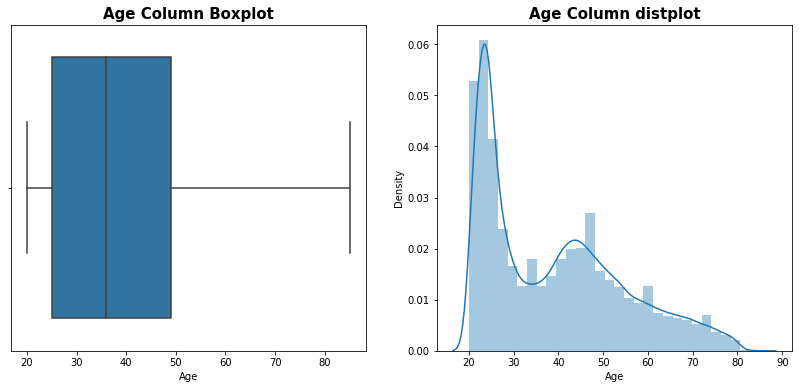

In [14]:
visualize_num_feature(health_CS,col='Age')

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64
The upper and lower bounds for suspected outliers are 85.0 and -11.0


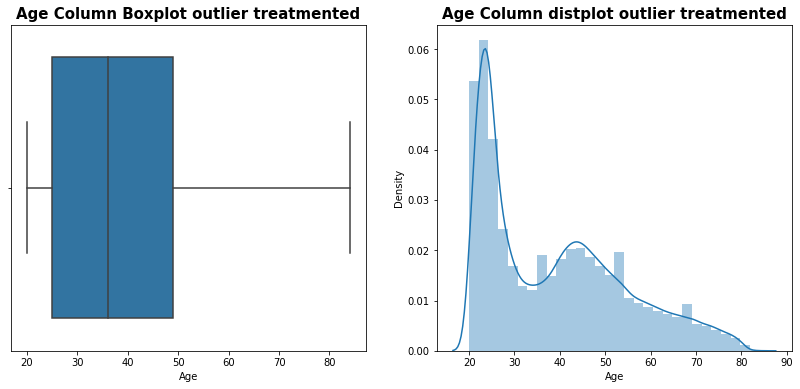

In [15]:
handle_outliers_using_IQR_range(health_CS,col='Age')

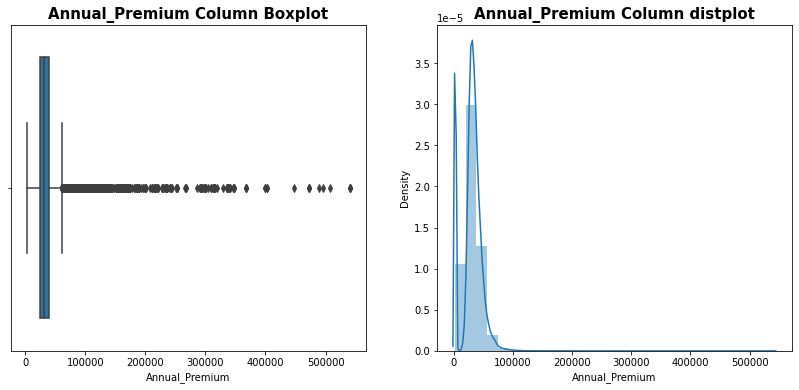

In [16]:
visualize_num_feature(health_CS,col='Annual_Premium')

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64
The upper and lower bounds for suspected outliers are 61892.5 and 1912.5


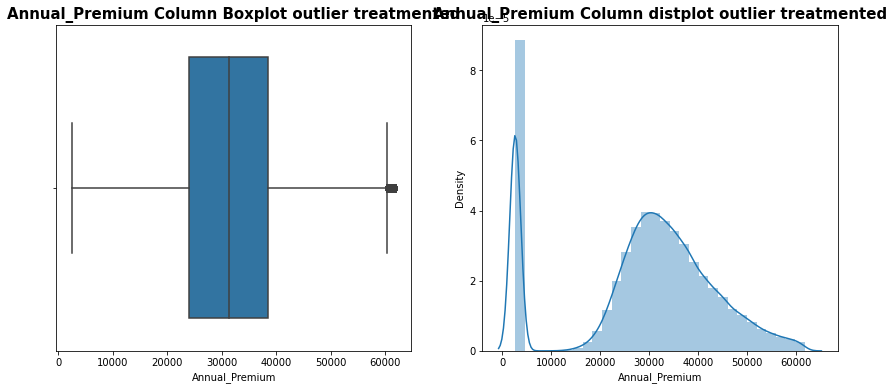

In [17]:
handle_outliers_using_IQR_range(health_CS,col='Annual_Premium')

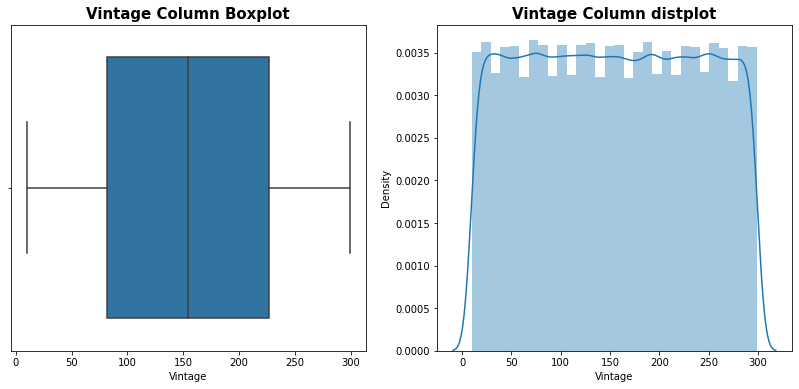

In [18]:
visualize_num_feature(health_CS,col='Vintage')

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64
The upper and lower bounds for suspected outliers are 444.5 and -135.5


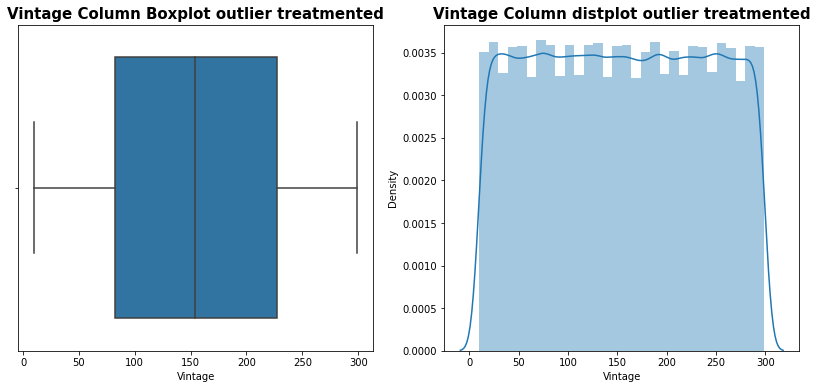

In [19]:
handle_outliers_using_IQR_range(health_CS,col='Vintage')

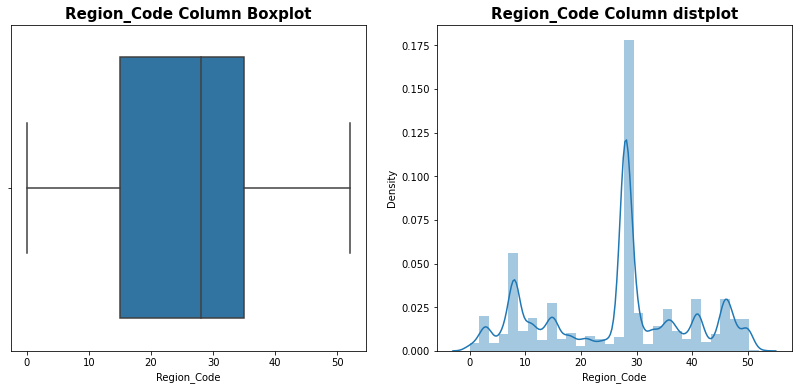

In [20]:
visualize_num_feature(health_CS,col='Region_Code')

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64
The upper and lower bounds for suspected outliers are 65.0 and -15.0


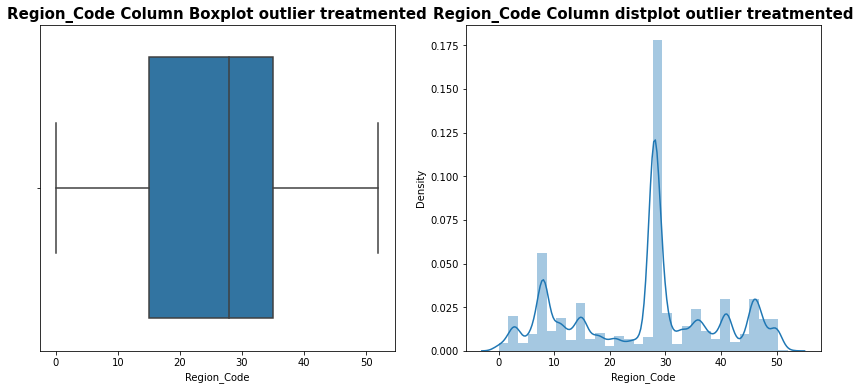

In [21]:
handle_outliers_using_IQR_range(health_CS,col='Region_Code')

In [22]:
# Functions used in this project for outlier determination (Not to Plot The Same Thing Again and Again)
""" Visualize the Categorical Features """
def visualize_cat_feature(df,col):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    
    sns.countplot(ax=axes[0],x =col, data = df)
    axes[0].set_xlabel(xlabel = f'{col} ', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = f'{col} count', fontdict={'fontsize': 14})
    axes[0].set_title(f'{col} countplot', fontdict={'fontsize': 15, 'fontweight':'bold'})
  
    
    sns.violinplot(ax = axes[1], y = col, data = df)
    axes[1].set_xlabel(xlabel = f'{col} Violin plot', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = col, fontdict={'fontsize': 14})
    axes[1].set_title(f'{col} ', fontdict={'fontsize': 15, 'fontweight':'bold'})

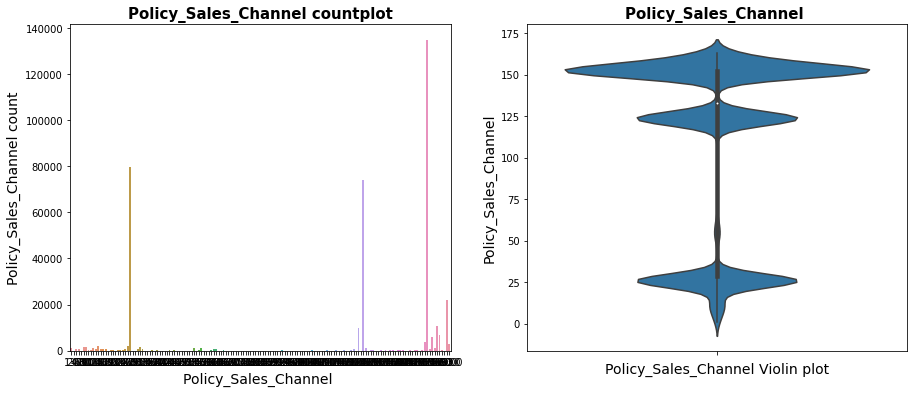

In [23]:
visualize_cat_feature(df=health_CS,col='Policy_Sales_Channel')

In [24]:
# Categorizing Policy_Sales_Channel feature
x = health_CS['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000<x<100000 else 'Channel_C' if 10000<x<=74000 else 'Channel_D') 
res = dict(zip(x.keys(),x.values))
health_CS['Policy_Sales_Channel_Categorical'] = health_CS['Policy_Sales_Channel'].map(res) 


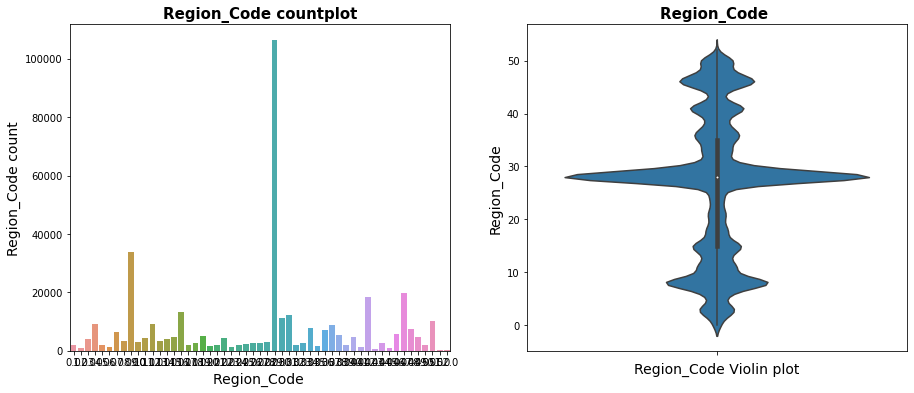

In [25]:
visualize_cat_feature(health_CS,'Region_Code')

In [26]:
# Categorizing Region Code feature
x = health_CS['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
res = dict(zip(x.keys(),x.values))
health_CS['Region_Code_Categorical'] = health_CS['Region_Code'].map(res) 

In [27]:
set_option('display.width', 150)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print(health_CS.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS
                         count      mean       std     min      25%      50%      75%       max
Age                   381109.0     38.82     15.51    20.0     25.0     36.0     49.0      85.0
Driving_License       381109.0      1.00      0.05     0.0      1.0      1.0      1.0       1.0
Region_Code           381109.0     26.39     13.23     0.0     15.0     28.0     35.0      52.0
Previously_Insured    381109.0      0.46      0.50     0.0      0.0      0.0      1.0       1.0
Annual_Premium        381109.0  30564.39  17213.16  2630.0  24405.0  31669.0  39400.0  540165.0
Policy_Sales_Channel  381109.0    112.03     54.20     1.0     29.0    133.0    152.0     163.0
Vintage               381109.0    154.35     83.67    10.0     82.0    154.0    227.0     299.0
Response              381109.0      0.12      0.33     0.0      0.0      0.0      0.0       1.0


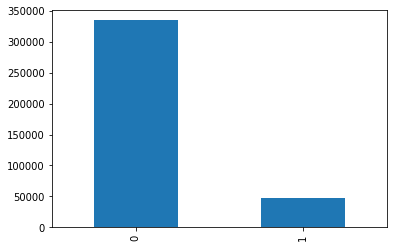

In [28]:
health_CS['Response'].value_counts().plot(kind='bar')

This is a highly imbalanced dataset

Text(0.5, 1.0, 'Age V/S Annual Premium Treated')

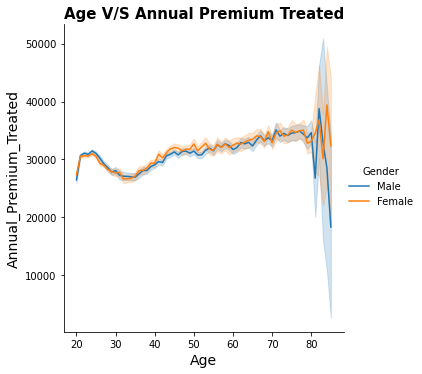

In [29]:
sns.relplot(
    data=health_CS,
    x="Age", y="Annual_Premium",
    hue="Gender",
    kind="line")
plt.xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
plt.title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

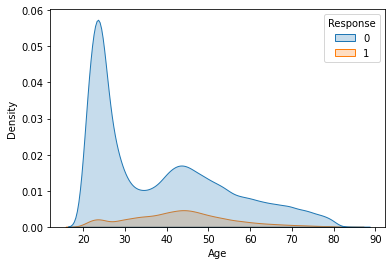

In [30]:
sns.kdeplot(health_CS['Age'],color='green',shade=True,hue=health_CS['Response'])

Text(0.5, 1.0, 'Policy_Sales_Channel')

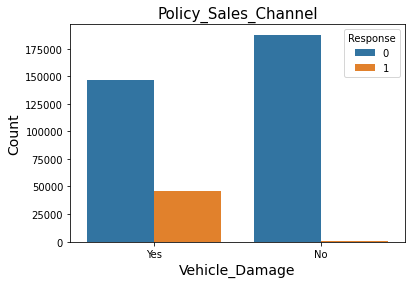

In [31]:
sns.countplot(x = 'Vehicle_Damage', data = health_CS, hue='Response')
plt.xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Policy_Sales_Channel',fontdict={'fontsize': 15})

Text(0.5, 1.0, 'Vehicle_Damage_Distribution')

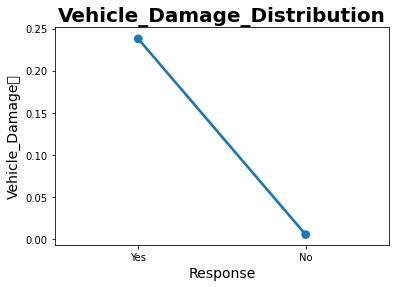

In [32]:
sns.pointplot(y = 'Response', data = health_CS, x='Vehicle_Damage',kind='point')
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Vehicle_Damage	', fontdict={'fontsize': 14})
plt.title('Vehicle_Damage_Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

Text(0.5, 1.0, 'Annual_Premium_Distribution')

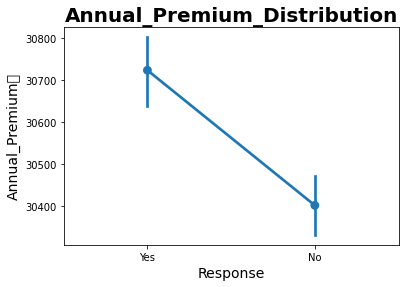

In [33]:
sns.pointplot(y = 'Annual_Premium', data = health_CS, x='Vehicle_Damage',kind='point')
plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Annual_Premium	', fontdict={'fontsize': 14})
plt.title('Annual_Premium_Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

Text(0.5, 1.0, 'Vehicle_Age')

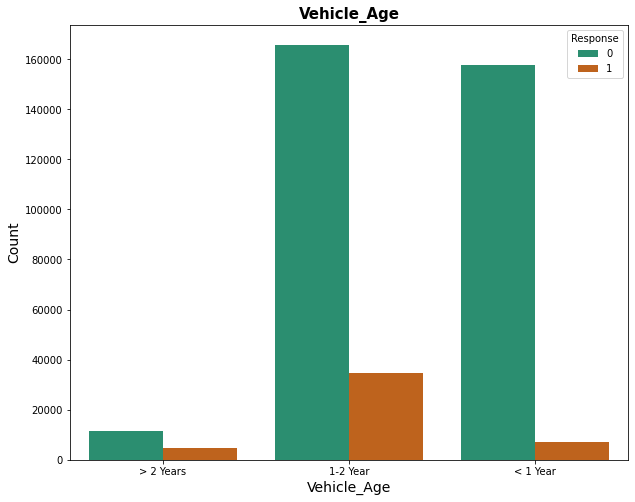

In [34]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Vehicle_Age', hue='Response', data = health_CS, palette="Dark2")
plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})



Text(0.5, 1.0, 'Vehicle_Age and response')

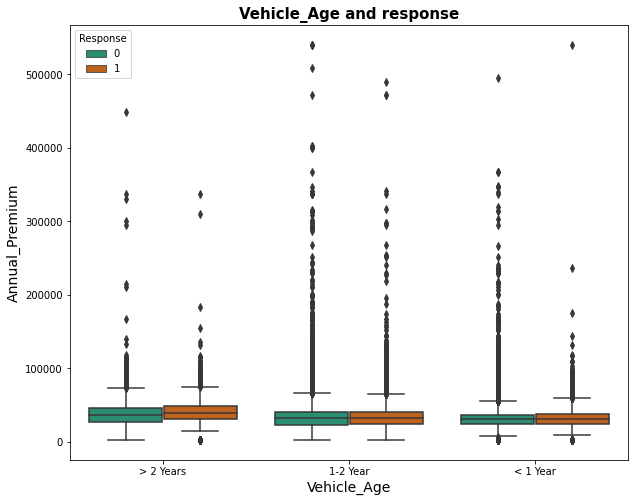

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'Vehicle_Age',y='Annual_Premium',hue='Response', data = health_CS, palette="Dark2")
plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
plt.title('Vehicle_Age and response', fontdict={'fontsize': 15, 'fontweight':'bold'})



Text(0.5, 1.0, 'Policy_Sales_Channel')

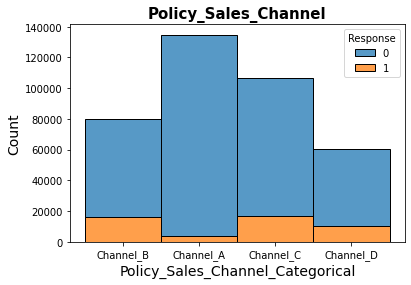

In [36]:
sns.histplot(x="Policy_Sales_Channel_Categorical", hue="Response", data=health_CS, stat="count", 
                 multiple="stack",binwidth=0.5)
plt.xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
plt.title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})


Dropping extra columns

In [37]:
health_CS=health_CS.drop(['Region_Code','Policy_Sales_Channel'],axis=1)

**Feature selection**
1. Numerical feature selection
2. Categorical feature selection

In [38]:
correlation=health_CS.corr()

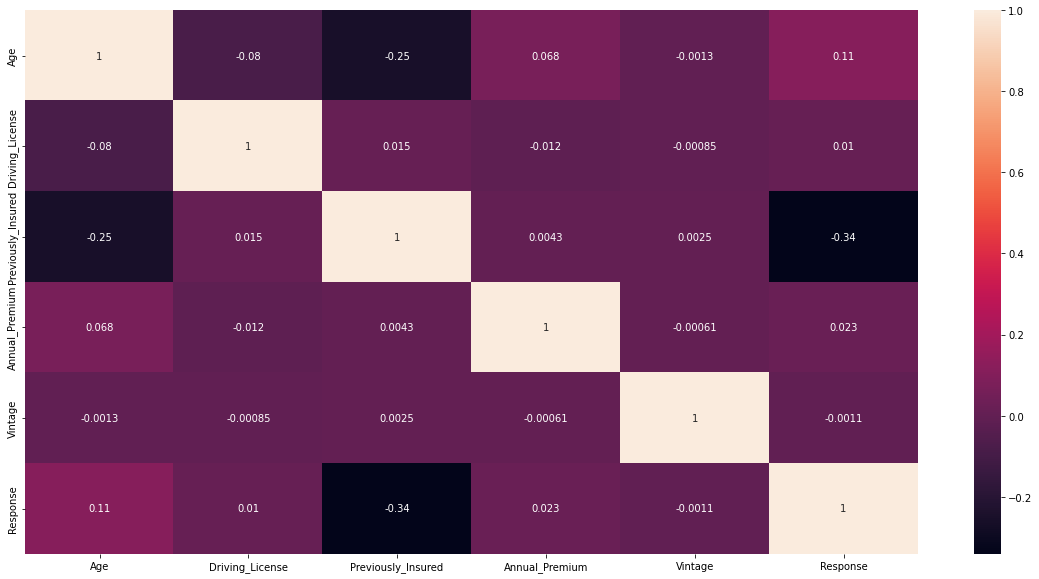

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True,)

One Hot Encoding

In [40]:
health_CS.columns

Index(['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [41]:
cols_to_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']

health_CS = pd.get_dummies(data = health_CS, columns=cols_to_encode)
health_CS.head()

,Age,Driving_License,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,...,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
id,,,,,,,,,,,,,,,,,,,,,
1,44,1,40454.0,217,1,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
2,76,1,33536.0,183,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,47,1,38294.0,27,1,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
4,21,1,28619.0,203,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
5,29,1,27496.0,39,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


**Standardization**

All features are on different scales. We standardize the numerical columns, so as to get all the feature values between 0 and 1.

In [42]:
col_to_norm = ['Annual_Premium', 'Age', 'Vintage']
health_CS[col_to_norm] = health_CS[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

Standardization of data was performed; i.e, all features are centered around zero and have variance one.

In [43]:
health_CS.head()

,Age,Driving_License,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,...,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
id,,,,,,,,,,,,,,,,,,,,,
1,0.33,1,0.57,0.75,1,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
2,2.40,1,0.17,0.34,0,0,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
3,0.53,1,0.45,-1.52,1,0,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
4,-1.15,1,-0.11,0.58,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
5,-0.63,1,-0.18,-1.38,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


# **Machine Learning Algorithms**

The classification models used for this analysis are: Logistic Regression, Decision Tree and Random Forest Classifier.

To build machine learning models the original data was divided into features (X) and target (y) and then split into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

##Spiliting Dataset into training(80%) and test set(20%)

In [79]:
y=health_CS['Response']
x=health_CS.drop(['Response'],axis=1)

In [80]:
x

,Age,Driving_License,Annual_Premium,Vintage,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
id,,,,,,,,,,,,,,,,,,,,
1,0.33,1,0.57,0.75,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0
2,2.40,1,0.17,0.34,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1
3,0.53,1,0.45,-1.52,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0
4,-1.15,1,-0.11,0.58,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
5,-0.63,1,-0.18,-1.38,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381105,2.27,1,-0.02,-0.79,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1
381106,-0.57,1,0.55,-0.28,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
381107,-1.15,1,0.26,0.08,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


In [90]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [82]:
X_train

,Age,Driving_License,Annual_Premium,Vintage,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C
id,,,,,,,,,,,,,,,,,,,,
45749,-1.08,1,-1.62,-1.03,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
150379,-1.08,1,-0.06,0.57,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
27588,1.43,1,0.21,-0.39,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1
282195,-0.63,1,0.19,-0.28,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
45561,-1.02,1,-0.51,-0.12,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73350,-0.76,1,-0.23,1.68,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1
371404,0.01,1,-0.20,0.94,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
312202,0.40,1,0.18,-0.41,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0


**Synthetic Minority Oversampling Technique (SMOTE)**
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [124]:
from collections import Counter
#from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
#X, y = make_classification(n_classes=2, class_sep=2,
#weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
#print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 900, 1: 900})
print(f'original dataset shape {Counter(y_train)}')
print(f'Resampled dataset shape {Counter(y_smote)}')

original dataset shape Counter({0: 267347, 1: 37540})
Resampled dataset shape Counter({0: 267347, 1: 267347})


#**Logistic regression**

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [98]:
logmodel=LogisticRegression(random_state=1)
logmodel.fit(X_smote,y_smote)
y_pred=logmodel.predict(X_test)

In [99]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [100]:
results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.66,0.26,0.95,0.4,0.78


**Accuracy coming out to be very low after using smote**Hi @dikshabhati2002 ,
SMOTE only adds pseudo data to the dataset you are trying to balance, using a variant of KNN. The downside of this is it might also add some noise to the data if the classes are not fully separable using KNN. And if the model focuses more on those pseudo data points then it is actually regressing.
So it is sort of a hit or miss. But in practice I have seen weight balancing to work much better than trying to balance the classes.
But if you want to balance the classes anyhow, you can try using under and over-sampling together or Tomek links. Also as you mentioned it is a NLP problem, if you are using DNN you can try output_bias. I have found this to be quite helpful.
Also choose your metric carefully, usually for imbalanced dataset ROC-AUC or F1 works the best.
Hope it helps! 😊

Hi @dikshabhati2002 ,

You can try few things:

Firstly analyze the confusion matrix and try to decide which is better metric for you. I have seen F1-score is better when the data is imbalanced and accuracy works better when the distribution is similar. Also you can check what is more important in your problem statement, like accuracy is used when the True Positives and True Negatives are important while F1-score is used when the False Negatives and False Positives are important.

Then in balancing the distribution, the better result is obtained by the combination of under-sampling and over-sampling as mentioned in the original SMOTE paper. So you can first try to under-sample the majority class and then you can apply SMOTE to the minority class.

I hope this can give you better result.

###**K-Nearest Neighbour**
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data
Initialise the value of k
For getting the predicted class, iterate from 1 to total number of training data points
Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [134]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_smote)
    error_rate.append(np.mean(pred_i != y_test))

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn.fit(X_smote,y_smote)

In [ ]:
y_pred = knn.predict(X_smote)

###**Support Vector Machine**
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_smote, y_smote)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_smote)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

#**Gaussian Naive Bayes**

In [102]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_smote,y_smote)

GaussianNB()

In [103]:
y_predNB=NB.predict(X_test)

In [106]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predNB)
cm

array([[39904, 27148],
       [  238,  8932]])

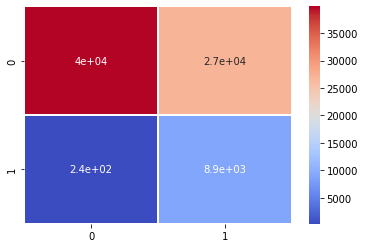

In [107]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')
plt.show()

In [104]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_predNB)
acc = accuracy_score(y_test, y_predNB)
prec = precision_score(y_test, y_predNB)
rec = recall_score(y_test, y_predNB)
f1 = f1_score(y_test, y_predNB)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.64,0.25,0.97,0.39,0.78


#**Decision Tree Classification**

Decision Tree Classification
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

Advantages of Decision Trees Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

Disadvantages of Decision Trees Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper

In [108]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [110]:
dct.fit(X_smote,y_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
y_predDTC=dct.predict(X_test)

In [113]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.66,0.26,0.95,0.4,0.78


#**Random Forest classifier**

Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

Step1:- Pick at random K data points from the training set

Step2:- Build the Decision tree associated to these K data points

Step3:- Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

Step4:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [116]:
rfc.fit(X_smote,y_smote)

RandomForestClassifier(criterion='entropy', random_state=0)

In [117]:
y_predrfc=rfc.predict(X_test)

In [118]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_predrfc)
acc = accuracy_score(y_test, y_predrfc)
prec = precision_score(y_test, y_predrfc)
rec = recall_score(y_test, y_predrfc)
f1 = f1_score(y_test, y_predrfc)

In [119]:
results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.81,0.31,0.44,0.36,0.65


#**XGBOOST classifier**

In [127]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
X_smote1=X_smote.copy()
X_smote1.columns = X_smote.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
xgb.fit(X_smote1,y_smote)

XGBClassifier()

In [129]:
X_test1=X_test.copy()
X_test1.columns = X_test.columns.str.translate("".maketrans({"[":"{", "]":"}","<":"^"}))
y_pred =xgb.predict(X_test1)

In [130]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [131]:

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.71,0.28,0.9,0.43,0.79


##**Step8: Model Optimization using Grid Search and K-Fold Cross validation**
There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

#**Cross vlaidation**


https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

**1)Grid search on Logistic Regression Model**

In [135]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [136]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [137]:
grid_search_log = grid_search_log.fit(X_smote,y_smote)

KeyboardInterrupt: ignored

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

In [ ]:
y_pred_log = grid_search_log.predict(X_test)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results